# Packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf
import yahoofinancials
from scipy.optimize import minimize
import seaborn as sn
from scipy.stats import anderson,kstest,shapiro, probplot

c:\Users\leona\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\leona\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\leona\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Masalah.  
Misalkan portofolio saham dengan komposisi saham TLKM, BBNI, dan ASII. Akan dicari nilai return dengan variansi minimal dan juga dicari komposisi dari masing-masing saham.  

In [18]:
stock = ['TSLA', 'DIS', 'NKE', 'AAPL', 'AXP', 'GS', 'GD', 'IBM', 'INTC', 'KO', 'PG', 'V', 'MA', 'BAC', 'NVDA', 'GOOGL', 'GOOG', 'FB', 'MSFT', 'AMZN',]
df = pd.DataFrame(columns=stock)
for i in stock :
    temp = yf.Ticker(i).history(period = '2y', interval = '1mo',actions=False)
    temp.dropna(inplace = True)
    temp['log_return'] = np.log(temp['Close']) - np.log(temp['Close'].shift(1))
    temp['log_return'].dropna(inplace = True)
    df[i] =temp['log_return'].dropna()

In [19]:
mu = df.mean().values
C = df.cov().values
e = np.ones(len(mu))
print(f'Vektor return {mu} dan \n matriks kovariansi \n {C} \n dan vektor e {e}')


Vektor return [ 0.04495615 -0.00443946  0.0034841   0.01630977  0.02004754  0.018966
  0.01638437  0.00789326 -0.01403059  0.01487427  0.0083819   0.00083582
  0.00486739  0.01569818  0.02126601  0.01675693  0.01714222 -0.00764631
  0.00908078 -0.01119872] dan 
 matriks kovariansi 
 [[ 4.08858628e-02  1.02147607e-02  9.71255318e-03  1.45312004e-02
   5.71498206e-03  6.04902430e-03  2.72076611e-03  9.75160746e-04
   2.34165345e-03  2.71864571e-03  2.77819030e-03  4.92759005e-03
   6.27815872e-03  6.48690835e-03  1.81808665e-02  8.09000619e-03
   8.37137026e-03  9.33376532e-03  9.85600003e-03  1.26851917e-02]
 [ 1.02147607e-02  9.58334614e-03  3.75548276e-03  4.12825996e-03
   5.94863515e-03  5.73758489e-03  3.42978065e-03  1.46439882e-03
   2.48914610e-03  2.93048896e-03  1.08846185e-03  4.58636233e-03
   4.63427023e-03  5.36332821e-03  4.53477891e-03  4.66230834e-03
   4.61135609e-03  2.59839336e-03  3.17152198e-03  4.54425190e-03]
 [ 9.71255318e-03  3.75548276e-03  7.10518838e-03  4.2

In [20]:
# mu = np.array([1.1, 1.2, 1.3])
# C = np.array([[0.01, 0, 0], [0, 0.05, 0], [0, 0, 0.07]])
# e = np.ones(len(mu))
# print(f'Vektor return {mu} dan \n matriks kovariansi \n {C} \n dan vektor e {e}')


Dari masalah 
\begin{equation}
\min\left\{ -t \mu^T \mathbf{x} +  \frac{1}{2}\mathbf{x}^T C  \mathbf{x} | \mathbf{e}^T \mathbf{x} = 1 \right\}
\end{equation}
dengan $t$ adalah suatu parameter tak negatif.  
dapat diperoleh bahwa persamaan untuk efficient frontiernya adalah : 
\begin{equation}
\sigma^2_P - \beta_0 = \frac{(\mu_P - \alpha_0)^2}{\alpha_1}
\end{equation}
dengan :
\begin{align}
\alpha_0 = \mu^T h_0 \\
\alpha_1 = \mu^T h_1 \\
\beta_0 = h_0^TCh_0
\end{align}
dan 
\begin{align}
h_0 &= \frac{C^{-1}e}{e^TC^{-1}e} \\  
h_1 &= C^{-1}\mu - \frac{e^TC^{-1}\mu}{e^TC^{-1}e} C^{-1}e
\end{align}

In [21]:
h_0 = (np.linalg.inv(C).dot(e))/(e.dot(np.linalg.inv(C)).dot(e))
h_1 = np.linalg.inv(C).dot(mu) -((e.dot(np.linalg.inv(C)).dot(mu))/(e.dot(np.linalg.inv(C)).dot(e)))*(np.linalg.inv(C).dot(e))
print(f'Diperoleh \n h_0 {h_0}\n dan \n h_1 {h_1}')

Diperoleh 
 h_0 [ 0.0636318  -0.870159   -0.10197809  0.01552866 -0.34642935  0.79728115
 -0.91443251 -0.2591027   0.42459456  0.01427017  1.06666529  1.34091805
 -0.46360071  0.39224923 -0.27529879  1.04838456 -0.57178148 -0.49959848
 -0.4216546   0.56051227]
 dan 
 h_1 [  2.04889164  -5.35434947   6.46351163  36.70844496  20.08990038
  -5.1708107  -14.18373398  68.21769516 -11.96745322  15.09485081
 -31.14062549 -87.43796757  39.0749654   -3.64971086  14.89936805
  44.51769395  21.45102971 -25.94194481 -29.28371173 -54.43604387]


In [22]:
alpha_0 = mu.dot(h_0)
alpha_1 = mu.dot(h_1)
beta_0 = h_0.dot(C).dot(h_0)
beta_2 = h_1.dot(C).dot(h_1)
print(f'Diperoleh \n alpha_0 : {alpha_0}, \n alpha_1 : {alpha_1}, \n beta_0 : {beta_0}\n beta_2 : {beta_2}')

Diperoleh 
 alpha_0 : 0.0016134336420941453, 
 alpha_1 : 3.5116968156107737, 
 beta_0 : 0.0002694528104829266
 beta_2 : 3.5116968156107755


Sehingga persamaan Efficient Frontier - nya menjadi :  
\begin{equation}
\sigma^2_P - 0.00875 = \frac{(\mu_P - 1.125)^2}{0.035}
\end{equation}

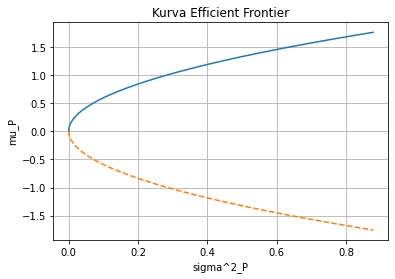

Nilai return dari variansi yang minimum adalah : 0.0016134336420941453
Dengan masing-masing proporsi saham ['TSLA', 'DIS', 'NKE', 'AAPL', 'AXP', 'GS', 'GD', 'IBM', 'INTC', 'KO', 'PG', 'V', 'MA', 'BAC', 'NVDA', 'GOOGL', 'GOOG', 'FB', 'MSFT', 'AMZN'] adalah sebagai berikut : {h_0}


In [23]:
t = np.linspace(0,0.5, 1000)
sigma_P = beta_0 + t**2 *beta_2
mu_p = alpha_0 + t*alpha_1
mu_p_bawah = alpha_0 - t*alpha_1
plt.plot(sigma_P, mu_p)
plt.plot(sigma_P, mu_p_bawah, '--')
plt.xlabel('sigma^2_P')
plt.ylabel('mu_P')
plt.grid(True)
plt.title('Kurva Efficient Frontier')
plt.show()
print(f'Nilai return dari variansi yang minimum adalah : {np.min(mu_p)}')
print(f'Dengan masing-masing proporsi saham',stock ,'adalah sebagai berikut : {h_0}')

Misalkan ditambahkan sebuah asset \textit{risk-free} dengan \textit{rate of return} $r = 1.02$. Maka diperoleh capital market linenya sebagai berikut : 

In [34]:
def objective(weights): 
    weights = np.array(weights)
    return weights.dot(C).dot(weights.T)
# The constraints
cons = (# The weights must sum up to one.
        {"type":"eq", "fun": lambda x: np.sum(x)-1}, 
        # This constraints says that the inequalities (ineq) must be non-negative.# The expected daily return of our portfolio and we want to be at greater than 0.002352

        )
# Every stock can get any weight from 0 to 1
bounds = tuple((0,1) for x in range(mu.shape[0]))
# Initialize the weights with an even split
# In out case each stock will have 10% at the beginning
guess = [1./mu.shape[0] for x in range(mu.shape[0])]
optimized_results = minimize(objective, guess, method = "SLSQP", bounds=bounds, constraints=cons)
x_ = optimized_results.x

In [35]:
np.sum(np.round(x_,5))

0.9999999999999999

In [36]:
port_ = dict(zip(stock,np.round(x_,5)))
port = dict()
for (key,value) in port_.items():
    if value >0 : 
        port[key] = value
port

{'IBM': 0.14091,
 'INTC': 0.19547,
 'KO': 0.13701,
 'PG': 0.31434,
 'BAC': 0.0034,
 'GOOGL': 0.06369,
 'GOOG': 0.06041,
 'MSFT': 0.06778,
 'AMZN': 0.01699}

In [44]:
start = 1e3 
budget_ = dict()
for (key,value) in port.items():
    if value >0 : 
        budget_[key] = value*start
budget_

{'IBM': 140.91,
 'INTC': 195.47,
 'KO': 137.01,
 'PG': 314.34000000000003,
 'BAC': 3.4,
 'GOOGL': 63.69,
 'GOOG': 60.41,
 'MSFT': 67.78,
 'AMZN': 16.990000000000002}

In [45]:
budget = pd.DataFrame.from_dict(data= budget_, orient= 'index').T
budget.rename(index={0: 'Total Spread'}, inplace= True)
budget

,IBM,INTC,KO,PG,BAC,GOOGL,GOOG,MSFT,AMZN
Total Spread,140.91,195.47,137.01,314.34,3.4,63.69,60.41,67.78,16.99


In [46]:
expense = pd.DataFrame(columns=port.keys())
for item in port.keys(): 
    temp = yf.Ticker(item).history(period = '1d', interval = '1mo',actions=False)
    expense[item] = temp['Close']*100 #1 lot
expense.rename(index={expense.index[0]: str('Closing ' + str(expense.index[0]).split(' ')[0])}, inplace= True)
expense

,IBM,INTC,KO,PG,BAC,GOOGL,GOOG,MSFT,AMZN
Date,,,,,,,,,
Closing 2022-05-20,12623.000336,4041.999817,5995.000076,13952.000427,3314.699936,212263.989258,213462.011719,24866.000366,211050.488281


In [47]:
qty = pd.concat([expense,budget])
temp_ = pd.DataFrame(np.round(qty.iloc[1] / qty.iloc[0],0)).T
temp_.rename(index={0: 'Total Lot'}, inplace= True)
qty = pd.concat([qty, temp_])
spend = pd.DataFrame(np.round(qty.iloc[2] * qty.iloc[0],0)).T
finale = pd.concat([qty, spend])
finale.rename(index={0: 'Total Spending'}, inplace= True)
finale

,IBM,INTC,KO,PG,BAC,GOOGL,GOOG,MSFT,AMZN
Closing 2022-05-20,12623.000336,4041.999817,5995.000076,13952.000427,3314.699936,212263.989258,213462.011719,24866.000366,211050.488281
Total Spread,140.910000,195.470000,137.010000,314.340000,3.400000,63.690000,60.410000,67.780000,16.990000
Total Lot,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Total Spending,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [48]:
finale.sum(axis = 1)

Closing 2022-05-20    701569.190216
Total Spread            1000.000000
Total Lot                  0.000000
Total Spending             0.000000
dtype: float64

In [49]:
print(f'return :', x_.dot(mu)*100, '%')
print(f'risk :', x_.dot(C).dot(x_)*100, '%')
print(f'Total Money :',finale.sum(axis=1)[-1])
print(f'Total Idle Money :', start - finale.sum(axis=1)[-1])

return : 0.5623699392371675 %
risk : 0.14880631929150726 %
Total Money : 0.0
Total Idle Money : 1000.0


In [50]:
finale.to_csv(str('USA '+finale.index[0].split(' ')[1]+'.csv'))